In [1]:
# import packages

# standard imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
# modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV

In [2]:
pd.set_option("display.max_rows", 101) # in order to display all rows 

In [3]:
# read in the filtered train data 
train= pd.read_csv('datasets/train_filtered.csv') 

In [4]:
# Create X and y.
X = train[['Overall Qual', 
           'Gr Liv Area', 
           'Garage Area', 
           'Garage Cars', 
           'Total Bsmt SF', 
           '1st Flr SF', 
           'Year Built'
          ]]

y = train['SalePrice']

In [5]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.428,
    random_state=42,
)

In [6]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [7]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1173, 7)
y_train shape is: (1173,)
Z_test shape is: (878, 7)
y_test shape is: (878,)


In [8]:
ols = LinearRegression()

In [9]:
ols.fit(Z_train, y_train)

LinearRegression()

In [10]:
print(f'Training R score: {ols.score(Z_train, y_train)}')

Training R score: 0.7635769785356


In [11]:
print(f'Training R score: {ols.score(Z_test, y_test)}')

Training R score: 0.8145101456143369


In [12]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3,3,100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

In [13]:
# Here is the optimal value of alpha
lasso_cv.alpha_

869.7490026177834

In [14]:
test = pd.read_csv('datasets/test.csv') 

In [15]:
test=test.fillna(0)

In [16]:
# Create X 
X_test = test[['Overall Qual', 
           'Gr Liv Area', 
           'Garage Area', 
           'Garage Cars', 
           'Total Bsmt SF', 
           '1st Flr SF', 
           'Year Built'
          ]]

In [17]:
ssc = StandardScaler()
Z_test_data = ssc.fit_transform(X_test)

In [18]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3,3,100)

# Cross-validate over our list of Lasso alphas.
lasso_cross_val = LassoCV(alphas=l_alphas, cv=5)

# Fit model using best ridge alpha!
lasso_cross_val.fit(Z_test_data, y_test);

In [19]:
y_test_preds = lasso_cross_val.predict(Z_test_data)

In [20]:
predicted=pd.DataFrame({'Id':test['Id'], 'SalePrice':y_test_preds})

In [21]:
predicted.head()

,Id,SalePrice
0,2658,161443.041929
1,2718,178870.865801
2,2414,182738.339287
3,1989,172805.624525
4,625,180047.770758


In [22]:
predicted.to_csv('datasets/lasso_predictions_2.csv', index=False)

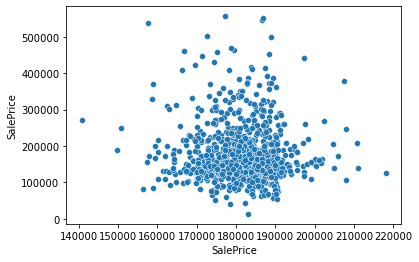

In [23]:
sns.scatterplot(x=predicted['SalePrice'], y=train['SalePrice'])
plt.savefig('data_visualization/predicted_vs_actual_lasso2.jpeg')

In [24]:
lasso_cross_val.coef_

array([ 1874.64973323, -6097.32454954, -2750.72987099, -2337.14523668,
       -6690.27039627,  9561.9761285 ,  5680.67337932])

In [25]:
pd.DataFrame(lasso_cross_val.coef_,index=X_test.columns, columns=['Coefficient'])

,Coefficient
Overall Qual,1874.649733
Gr Liv Area,-6097.324550
Garage Area,-2750.729871
Garage Cars,-2337.145237
Total Bsmt SF,-6690.270396
1st Flr SF,9561.976128
Year Built,5680.673379
